In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
df = pd.read_csv('fifa19.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# there are few features that are not important, so we going to drop them
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.shape

(18207, 88)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [7]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [8]:
#Cleaning the data
df['Wage'] = df['Wage'].str.replace('€', ' ')
df['Wage'] = df['Wage'].str.replace('K', ' ')

In [9]:
df['Wage'].head

<bound method NDFrame.head of 0         565 
1         405 
2         290 
3         260 
4         355 
         ...  
18202       1 
18203       1 
18204       1 
18205       1 
18206       1 
Name: Wage, Length: 18207, dtype: object>

In [10]:
df['Wage'] = df['Wage'].astype('int')

In [11]:
df['Wage'].dtype

dtype('int32')

In [12]:
#Checking the null values
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [13]:
df['Release Clause in Million'] = df['Release Clause'].str.replace('M', ' ')

In [14]:
df['Release Clause in Million'] = df['Release Clause in Million'].str.replace('€', ' ')
df['Release Clause in Million'] = df['Release Clause in Million'].str.replace('K', ' ')

In [15]:
df['Release Clause in Million'] = df['Release Clause in Million'].astype('float')

In [16]:
df['Release Clause in Million'].head()

0    226.5
1    127.1
2    228.1
3    138.6
4    196.4
Name: Release Clause in Million, dtype: float64

In [17]:
#Cheking the count of clubs
counts_club = df['Club'].value_counts()
counts_club = counts_club.reset_index()
counts_club.columns = ['Club','Count']
print(counts_club)

                    Club  Count
0    Eintracht Frankfurt     33
1        Manchester City     33
2      Borussia Dortmund     33
3      Manchester United     33
4     Fortuna Düsseldorf     33
..                   ...    ...
646            Tromsø IL     20
647        Internacional     20
648          Limerick FC     19
649         Sligo Rovers     19
650           Derry City     18

[651 rows x 2 columns]


In [18]:
#Getting top 5 club
Top5_club = counts_club[counts_club['Count']>= 33].head(5)

In [19]:
#Players from countries
counts_nat = df['Nationality'].value_counts()
counts_nat = counts_nat.reset_index()
counts_nat.columns = ['Nationality','Count']
print(counts_nat)

              Nationality  Count
0                 England   1662
1                 Germany   1198
2                   Spain   1072
3               Argentina    937
4                  France    914
..                    ...    ...
159                 Qatar      1
160                  Guam      1
161             Indonesia      1
162  United Arab Emirates      1
163              Botswana      1

[164 rows x 2 columns]


In [20]:
Country_with_morethan500 = counts_nat[counts_nat['Count']>=500]

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count', ylabel='Nationality'>

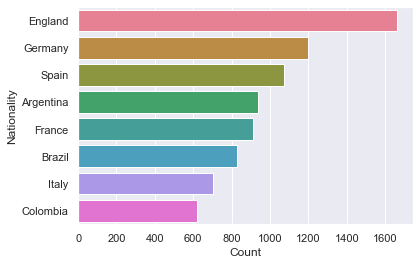

In [21]:
#Top 8 countries with most numbers of players in Club
sns.set_theme(style="darkgrid")
sns.barplot(Country_with_morethan500['Count'], Country_with_morethan500['Nationality'], palette="husl" )

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count', ylabel='Club'>

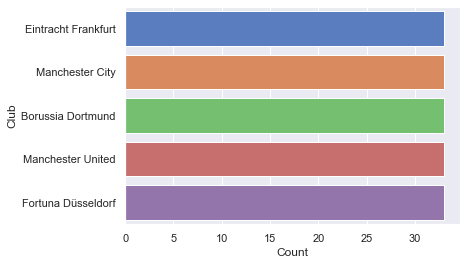

In [22]:
sns.set_theme(style="darkgrid")
sns.barplot(Top5_club['Count'], Top5_club['Club'], palette='muted')

In [23]:
# Top players in terms of wages
player_with_wage = pd.DataFrame(df[['Name','Wage']])

In [24]:
player_with_wage.head()

,Name,Wage
0,L. Messi,565
1,Cristiano Ronaldo,405
2,Neymar Jr,290
3,De Gea,260
4,K. De Bruyne,355


In [25]:
Most_Expensive_player = player_with_wage[player_with_wage['Wage']>= 350]

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wage', ylabel='Name'>

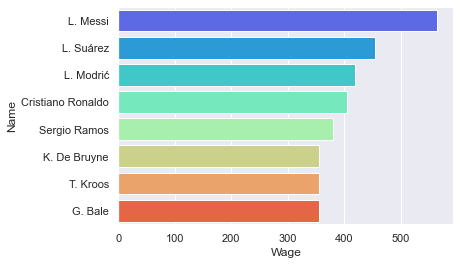

In [26]:
# Visualization of top players in terms of wages
sns.set_theme(style="darkgrid")
sns.barplot(Most_Expensive_player['Wage'],Most_Expensive_player['Name'], palette='rainbow', order=Most_Expensive_player.sort_values('Wage',ascending = False).Name)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

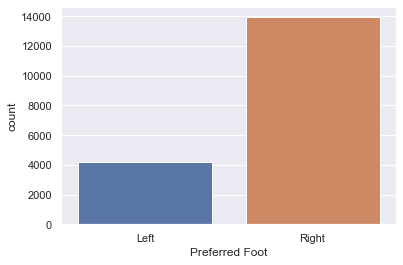

In [27]:
#Count of players in terms of Preffered foot
sns.set()
sns.countplot(df['Preferred Foot'])

In [28]:
data = df.groupby('Name')['Preferred Foot']

In [29]:
df['Nationality'].value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
Qatar                      1
Guam                       1
Indonesia                  1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64

In [30]:
df.sort_values('Preferred Foot', inplace = True)
filter = df['Preferred Foot']=='Left'
df['Name'].where(filter, inplace = True)

In [31]:
df['Name'].head()

0          L. Messi
3861    Yeom Ki Hun
3859       N. Baker
3858       M. Zeman
7952     A. Bastoni
Name: Name, dtype: object

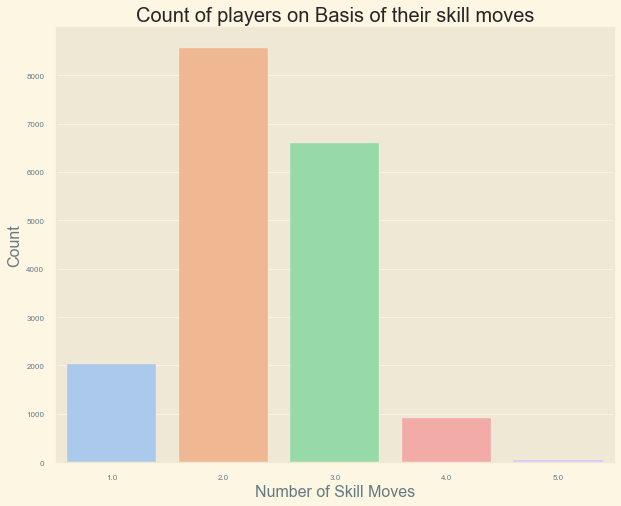

In [39]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Skill Moves', data = df, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


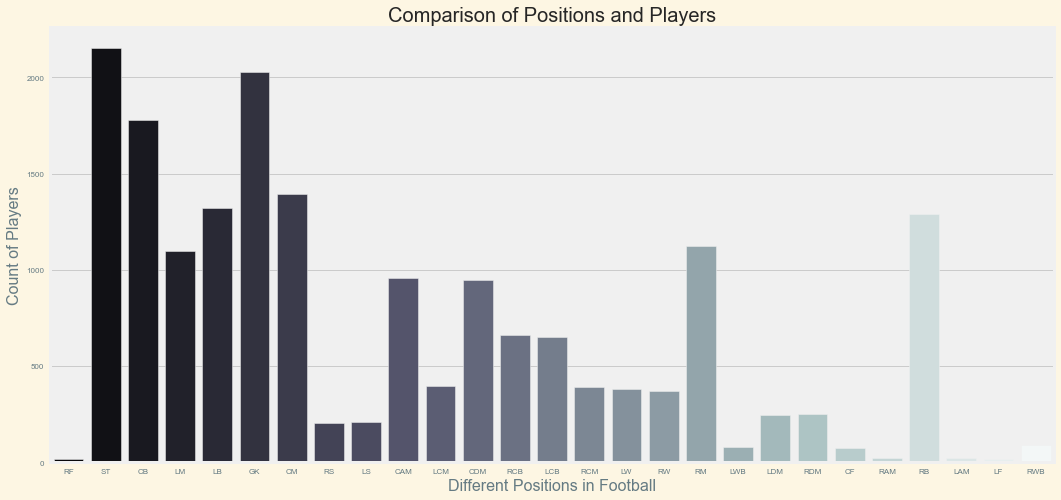

In [40]:
# different positions acquired by the players 

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = df, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

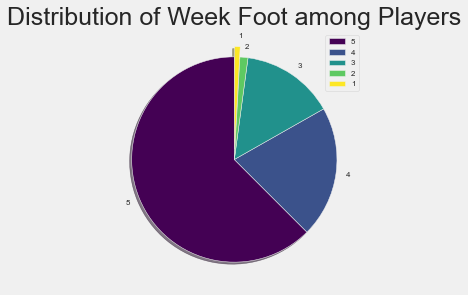

In [44]:
# plotting a pie chart to represent the share of week foot players

labels = ['5', '4', '3', '2', '1'] 
size = df['Weak Foot'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()